                                             Simple Linear Regression

we will see how to use scikit-learn to implement simple linear regression. We have downloaded a dataset that is related to fuel consumption and Carbon dioxide emission of cars. Then, we split our data into training and test sets, create a model using training set, evaluate our model using test set, and finally use model to predict unknown value. 

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pylab as pl
%matplotlib inline

In [4]:
df = pd.read_csv('FuelConsumptionCo2.csv')

In [5]:
df.head() # To see first five rows of the data

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [6]:
df.describe() # to summarize the data

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


In [7]:
column_data=df[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB','CO2EMISSIONS']]

In [8]:
column_data.head(4)

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,8.5,196
1,2.4,4,9.6,221
2,1.5,4,5.9,136
3,3.5,6,11.1,255


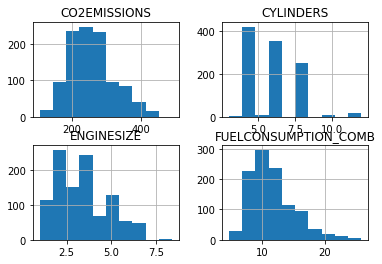

In [9]:
column_data_show=df[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB','CO2EMISSIONS']]
column_data_show.hist()
plt.show()

We will plot each of these features vs the Emission, to see how linear is their relation

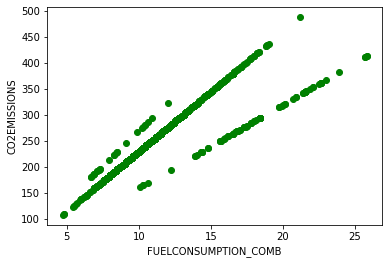

In [13]:
plt.scatter(df.FUELCONSUMPTION_COMB,df.CO2EMISSIONS,color='green')
plt.xlabel('FUELCONSUMPTION_COMB')
plt.ylabel('CO2EMISSIONS')
plt.show()

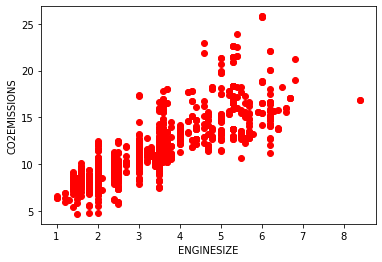

In [16]:
plt.scatter(df.ENGINESIZE,df.FUELCONSUMPTION_COMB,color='red')
plt.xlabel('ENGINESIZE')
plt.ylabel('CO2EMISSIONS')
plt.show()

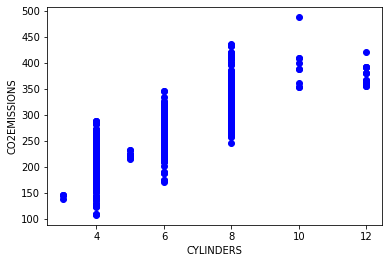

In [18]:
plt.scatter(df.CYLINDERS,df.CO2EMISSIONS,color='blue')
plt.xlabel('CYLINDERS')
plt.ylabel('CO2EMISSIONS')
plt.show()

 Create Train and Test Data

In [46]:
from sklearn.model_selection import train_test_split
x_independent_variable = column_data.iloc[:,0].values

In [47]:
x_independent_variable

array([2. , 2.4, 1.5, ..., 3. , 3.2, 3.2])

In [48]:
y_dependent_variable=column_data.iloc[:,-1].values

In [49]:
y_dependent_variable

array([196, 221, 136, ..., 271, 260, 294], dtype=int64)

In [50]:
X_train, X_test, y_train, y_test = train_test_split(x_independent_variable, y_dependent_variable, test_size = 0.2, random_state = 0)

In [51]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()


In [68]:

X_train = sc_X.fit_transform(X_train.reshape(-1,1))

In [69]:
X_train

array([[ 0.17888326],
       [ 0.88826226],
       [ 0.10794536],
       [-0.60143364],
       [-1.31081264],
       [ 0.95920016],
       [ 3.58390247],
       [-0.95612314],
       [-0.95612314],
       [-0.67237154],
       [ 1.17201386],
       [-1.31081264],
       [ 0.10794536],
       [ 0.10794536],
       [ 0.17888326],
       [-1.09799894],
       [-0.67237154],
       [ 0.32075906],
       [ 0.17888326],
       [-1.38175054],
       [-1.31081264],
       [ 1.17201386],
       [ 0.10794536],
       [ 1.88139287],
       [ 0.10794536],
       [ 0.10794536],
       [-0.95612314],
       [-0.67237154],
       [ 0.17888326],
       [ 0.24982116],
       [-1.09799894],
       [ 1.38482756],
       [ 0.10794536],
       [-0.24674414],
       [ 1.38482756],
       [ 0.10794536],
       [-0.67237154],
       [-0.95612314],
       [-0.60143364],
       [ 0.03700746],
       [ 0.17888326],
       [-0.95612314],
       [-0.24674414],
       [-0.95612314],
       [-0.95612314],
       [-0

In [71]:
sc_y = StandardScaler()
y_train = sc_y.fit_transform(y_train.reshape(-1,1))

In [72]:
y_train

array([[ 0.51570121],
       [ 1.42256615],
       [-0.2161547 ],
       [-0.62981239],
       [-1.39348813],
       [ 0.14977325],
       [ 2.09078241],
       [-1.90260528],
       [-0.62981239],
       [-0.94801061],
       [ 0.3566021 ],
       [-0.97983044],
       [-0.32752408],
       [-0.04114568],
       [-0.24797452],
       [-1.42530795],
       [-0.62981239],
       [-0.18433488],
       [-0.12069523],
       [-1.13892955],
       [-1.3616683 ],
       [ 0.91344899],
       [-0.29570426],
       [ 2.47262028],
       [-0.69345204],
       [ 0.03840388],
       [-0.18433488],
       [-0.18433488],
       [ 0.10204352],
       [ 0.10204352],
       [-1.5048575 ],
       [ 0.94526881],
       [-0.05705559],
       [ 0.54752103],
       [ 1.94759321],
       [ 0.65889041],
       [-0.43889346],
       [-1.13892955],
       [-0.66163221],
       [-0.40707363],
       [-0.2161547 ],
       [-0.88437097],
       [ 0.2134129 ],
       [-1.39348813],
       [-0.51844301],
       [-1

In [55]:
from sklearn.linear_model import LinearRegression

In [56]:
regressor = LinearRegression()

In [58]:
regressor.fit(X_train , y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [59]:
print ('Coefficients: ', regressor.coef_)
print ('Intercept: ', regressor.intercept_)

Coefficients:  [[0.88026049]]
Intercept:  [-1.69887105e-16]


Text(0, 0.5, 'Emission')

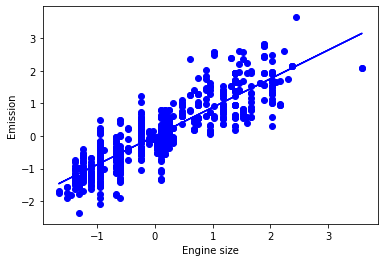

In [66]:
plt.scatter(X_train,y_train, color='blue')
plt.plot(X_train, regressor.predict(X_train), color = 'blue')
plt.xlabel("Engine size")
plt.ylabel("Emission")

Text(0, 0.5, 'Emission')

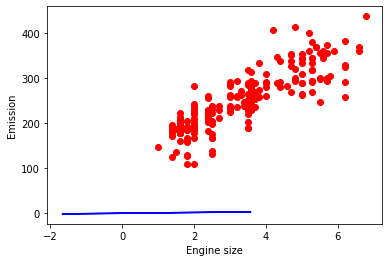

In [73]:
plt.scatter(X_test, y_test, color = 'red')
plt.plot(X_train, regressor.predict(X_train), color = 'blue')
plt.xlabel("Engine size")
plt.ylabel("Emission")

In [76]:
X_test

array([5.5, 2.4, 2.4, 2.7, 2.5, 4.4, 2.4, 3.6, 2.4, 5. , 3.6, 6.8, 3. ,
       4.4, 1.4, 4. , 4.8, 1.6, 3.5, 6.6, 1.8, 3.5, 3.5, 2. , 2.5, 3. ,
       3.8, 5.3, 5.5, 2. , 5.6, 2.5, 3.5, 3. , 1.8, 1.6, 5.7, 2.4, 2.7,
       3.6, 1.8, 1.8, 2.4, 2. , 5.5, 2. , 2.4, 1.6, 5.3, 5.9, 4.7, 3.7,
       3.6, 1.8, 2.4, 1.6, 4.6, 1.8, 3.2, 2. , 1.6, 2.5, 2. , 5.3, 3.6,
       4.8, 5. , 3.6, 1.6, 1.4, 5.8, 3.5, 4.7, 5.3, 4.4, 2.4, 3.6, 2. ,
       2. , 2. , 1.5, 3.7, 1.8, 3.8, 4.2, 3.4, 1.4, 1.4, 5. , 6.2, 3. ,
       2. , 2. , 5. , 5.7, 5.4, 2.5, 3.5, 6.6, 3.3, 2.4, 4.8, 1.8, 1.8,
       1.6, 1.4, 2. , 3.5, 1.6, 3.6, 1.6, 2. , 3.7, 3.5, 4.7, 3.2, 5.3,
       3.5, 5.2, 1.6, 3.8, 2. , 6.2, 1. , 1.6, 4. , 3.6, 3.6, 3. , 3.5,
       3.5, 4.8, 2. , 1.5, 5.3, 5.7, 3.6, 1.8, 2.5, 2.5, 5. , 1.8, 5. ,
       5.4, 1.8, 2.5, 3. , 5.6, 5.5, 2.5, 1.6, 3.5, 1.6, 3.2, 5. , 3.6,
       4. , 2. , 6.2, 3.6, 1.6, 2. , 1.6, 3.5, 3.5, 1.6, 5. , 1.6, 5.2,
       5.3, 3.2, 3.5, 3.7, 5.7, 4. , 3.6, 3.7, 3.5, 1.6, 5. , 6.